MNIST的图像数据是28像素 × 28像素的灰度图像（1通道），各个像素
的取值在0到255之间。每个图像数据都相应地标有“7”“2”“1”等标签。

In [36]:
import numpy as np  
  
# 指定mnist.npz文件的路径  
mnist_path = 'F:\LIULANQIdownloads\mnist.npz\mnist.npz'  
  
# 加载mnist.npz文件  
mnist_data = np.load(mnist_path)  
  
# 通常mnist.npz文件包含训练集和测试集的图像和标签  
# 假设它们被存储为'x_train', 'y_train', 'x_test', 'y_test'  
x_train, t_train = mnist_data['x_train'], mnist_data['y_train']  
x_test, t_test = mnist_data['x_test'], mnist_data['y_test']  
  
# 现在x_train, y_train, x_test, y_test包含了MNIST数据集的图像和标签  
# 您可以使用这些变量进行后续的处理和训练

<>:4: SyntaxWarning: invalid escape sequence '\L'
<>:4: SyntaxWarning: invalid escape sequence '\L'
C:\Users\WMU\AppData\Local\Temp\ipykernel_28532\4134210792.py:4: SyntaxWarning: invalid escape sequence '\L'
  mnist_path = 'F:\LIULANQIdownloads\mnist.npz\mnist.npz'


In [37]:
x_train = x_train.reshape(-1, 28 * 28)  # -1 表示自动计算该维度的大小  
x_test = x_test.reshape(-1, 28 * 28) 
# Normalize the images (归一化图像，但这里我们设置为False，所以不进行归一化)  
# 如果需要进行归一化，可以使用以下代码：  
# x_train = x_train.astype('float32') / 255.0  
# x_test = x_test.astype('float32') / 255.0  
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000,)
print(x_test.shape) # (10000, 784)
print(t_test.shape) # (10000,)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


这段代码涉及Python中模块的导入以及路径的配置。下面我将逐行解释这段代码的作用：

import sys, os
这行代码导入了Python的两个内置模块：sys 和 os。

sys 模块提供了许多与Python解释器和它的环境交互的函数和变量，比如sys.argv来获取命令行参数，或者sys.exit()来退出程序。

os 模块提供了丰富的方法来处理文件和目录，比如os.listdir()列出目录中的文件，或者os.path.join()构造文件路径。

sys.path.append(os.pardir)
这行代码修改了Python的模块搜索路径（sys.path），将当前目录的父目录（os.pardir）添加到这个路径中。

sys.path是一个列表，包含了所有目录的路径，Python会在这些目录中查找模块。

os.pardir是一个字符串，表示当前目录的父目录（通常是'..'）。

append()方法将os.pardir添加到sys.path的末尾，这样Python也会在父目录中查找模块。

import numpy as np

这行代码导入了numpy库，并使用别名np来引用它。numpy是Python中一个非常重要的科学计算库，提供了高性能的多维数组对象以及各种操作这些数组的函数。

from PIL import Image

这行代码从PIL（Python Imaging Library，现在通常使用其分支Pillow）中导入了Image模块。Image模块提供了打开、操作和保存图片文件的功能。

In [38]:
#显示图形
import sys, os
sys.path.append(os.pardir)
import numpy as np
from PIL import Image
def img_show(img):
 pil_img = Image.fromarray(np.uint8(img))
 pil_img.show()
img = x_train[0]
label = t_train[0]
print(label) # 5
print(img.shape) # (784,)
img = img.reshape(28, 28) # 把图像的形状变成原来的尺寸
print(img.shape) # (28, 28)
img_show(img)

5
(784,)
(28, 28)


下面，我们对这个MNIST数据集实现神经网络的推理处理。神经网络
的输入层有784个神经元，输出层有10个神经元。输入层的784这个数字来
源于图像大小的28 × 28 = 784，输出层的10这个数字来源于10类别分类（数
字0到9，共10类别）。此外，这个神经网络有2个隐藏层，第1个隐藏层有
50个神经元，第2个隐藏层有100个神经元。这个50和100可以设置为任何值。
下面我们先定义get_data()、init_network()、predict()这3个函数

In [39]:
def get_data():  
    # 假设 mnist_data 是一个已经加载了MNIST数据集的字典  
    x_train, t_train = mnist_data['x_train'], mnist_data['y_train']  
    x_test, t_test = mnist_data['x_test'], mnist_data['y_test']  
  
    # 展平图像数据为一维数组  
    x_train = x_train.reshape(-1, 28 * 28)  
    x_test = x_test.reshape(-1, 28 * 28)  
  
    # 归一化图像数据到0-1范围  
    x_train = x_train.astype('float32') / 255.0  
    x_test = x_test.astype('float32') / 255.0  
  
    # 返回处理后的图像数据和标签数据  
    return x_test, t_test

先，通常MNIST数据集的标签（t_train 和 t_test）不需要被展平或归一化，因为它们通常已经是一维的，并且表示图像的类别（例如，0-9的数字）。只有图像数据（x_train 和 x_test）需要被展平（如果模型需要一维输入）和归一化（以加速训练和提高模型性能）。

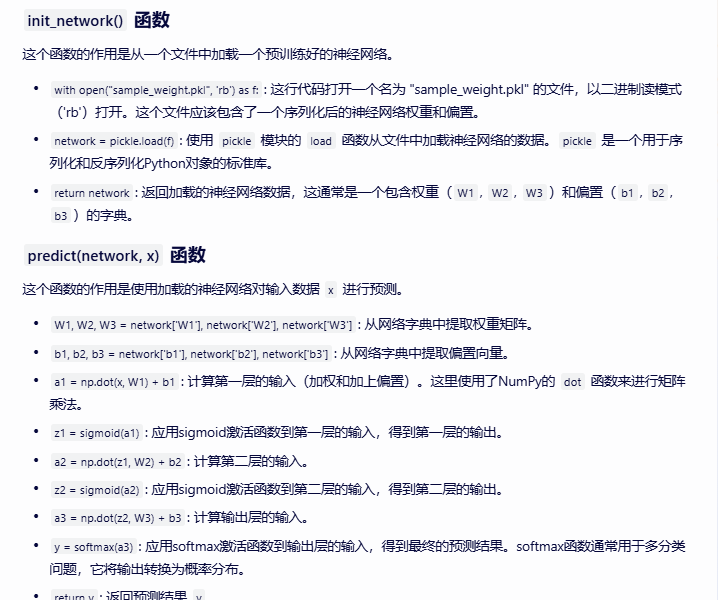

In [47]:
import pickle
def sigmoid(x):  
    return 1 / (1 + np.exp(-x))  
  
def softmax(x):  
    # 如果 x 是一维数组，将其转换为二维数组，形状为 (1, x.shape[0])  
    if x.ndim == 1:  
        x = x.reshape((1, -1))  
      
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # 为了数值稳定性，减去每行的最大值  
    return exp_x / exp_x.sum(axis=1, keepdims=True)

def init_network():
 with open(r"F:\LIULANQIdownloads\【源代码】深度学习入门：基于Python的理论与实现_20240716\ch03\sample_weight.pkl", 'rb') as f:
    network = pickle.load(f)
 return network
def predict(network, x):
 W1, W2, W3 = network['W1'], network['W2'], network['W3']
 b1, b2, b3 = network['b1'], network['b2'], network['b3']
 a1 = np.dot(x, W1) + b1
 z1 = sigmoid(a1)
 a2 = np.dot(z1, W2) + b2
 z2 = sigmoid(a2)
 a3 = np.dot(z2, W3) + b3
 y = softmax(a3)
 return y

In [48]:
x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
 y = predict(network, x[i])
 p = np.argmax(y) # 获取概率最高的元素的索引
 if p == t[i]:
    accuracy_cnt += 1
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
